In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , r2_score

from sklearn import metrics


#EDA

In [2]:
df = pd.read_csv('loan_data_set.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data preprocessing

In [7]:
def unique_data():
 print(f'the unique values of Dependents: {df["Dependents"].unique()}')
 print(f'the unique values of Loan_Amount_Term: {df["Loan_Amount_Term"].unique()}')
 print(f'the unique values of Property_Area: {sorted(df["Property_Area"].unique())}')
unique_data()

the unique values of Dependents: ['0' '1' '2' '3+' nan]
the unique values of Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
the unique values of Property_Area: ['Rural', 'Semiurban', 'Urban']


In [8]:
sum(df.duplicated(subset = "Loan_ID")) == 0
#cheack if there is something duplicated

True

In [9]:
df.drop("Loan_ID",axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# check missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
#filling the missing data
missing =['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for i in missing[:6]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
# check missing values
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
print(df['LoanAmount'].mode())
print('Mean of Loan Amount: ' + str (df['LoanAmount'].mean()))
print('Median of Loan Amount: ' + str (df['LoanAmount'].median()))

0    120.0
Name: LoanAmount, dtype: float64
Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [14]:
# the data is approxiametly normally distibuted
# so we will use mean to fill null values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
# check missing values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

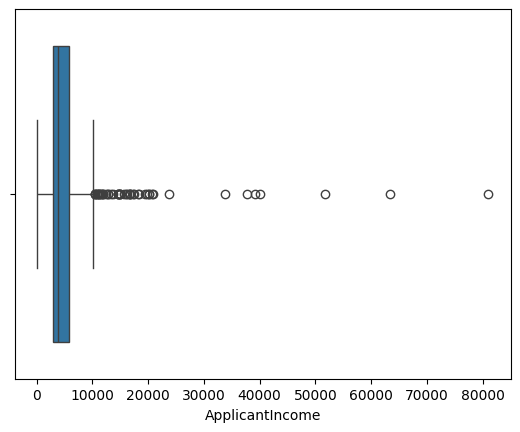

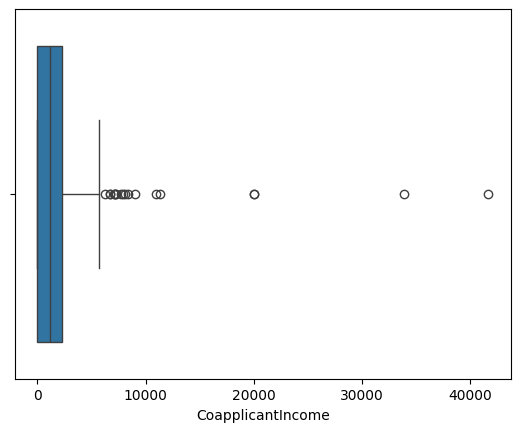

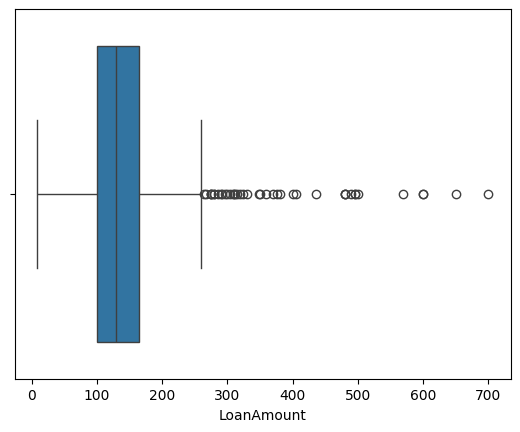

In [16]:
# check outliers
def print_ol():
 sns.boxplot(data=df , x = 'ApplicantIncome')
 plt.show()
 sns.boxplot(data=df , x = 'CoapplicantIncome')
 plt.show()
 sns.boxplot(data=df , x = 'LoanAmount')
 plt.show()
print_ol()

In [17]:
from scipy import stats

columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount']
for col in columns:
    # calculate interquartile range
    #percentile function calculates the values under the percentage of the second number given between brackets
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    min, max = q25 - cut_off, q75 + cut_off
    # identify outliers

    median_value = df[col].median()
    df.loc[df[col] < min, col] = median_value
    df.loc[df[col] > max, col] = median_value

df.shape

(614, 12)

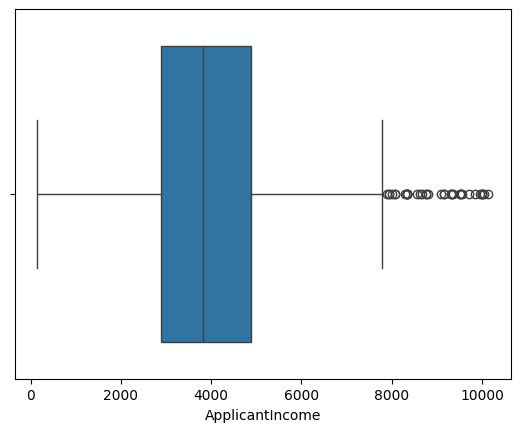

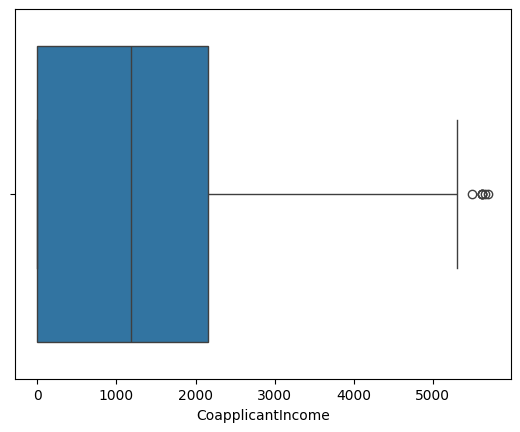

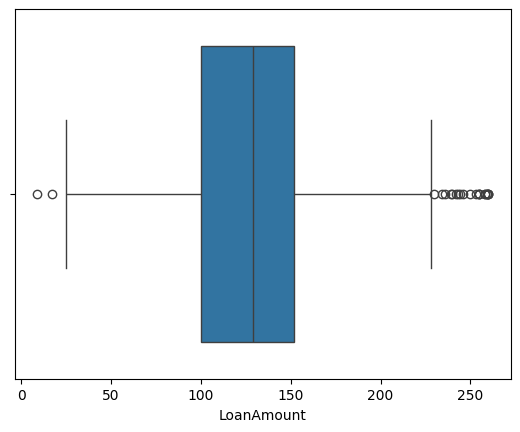

In [18]:
print_ol() #checking the data again after

In [19]:
# Exploratory Data Analysis
round(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4099.30,1848.71,150.0,2877.50,3812.25,4880.00,10139.0
CoapplicantIncome,614.0,1286.18,1440.20,0.0,0.00,1177.75,2159.25,5701.0
LoanAmount,614.0,129.18,44.92,9.0,100.25,129.00,152.00,260.0


# Visualizing the  data

In [20]:
col=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']

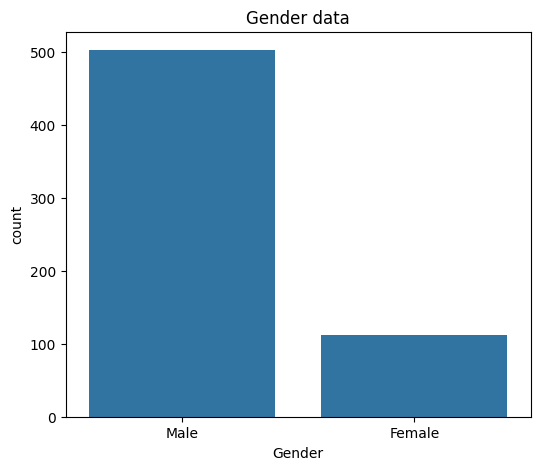

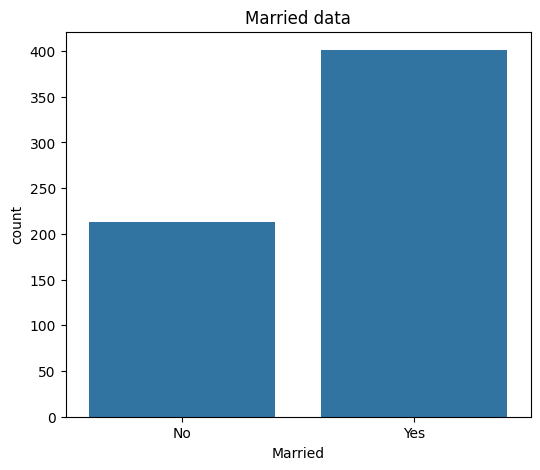

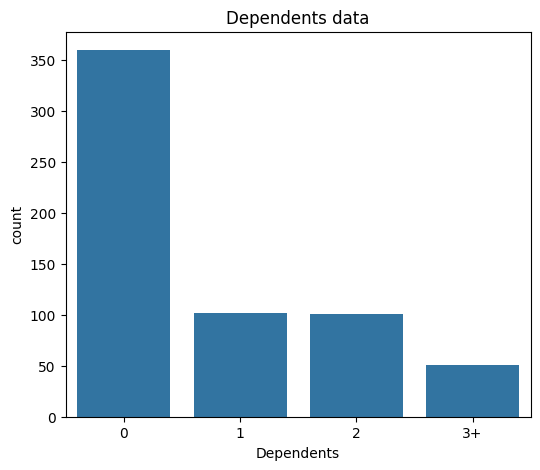

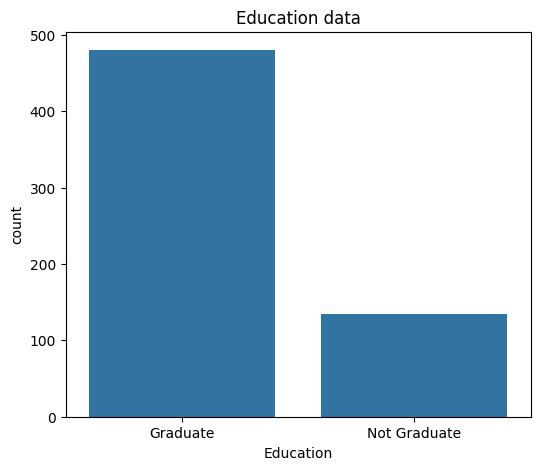

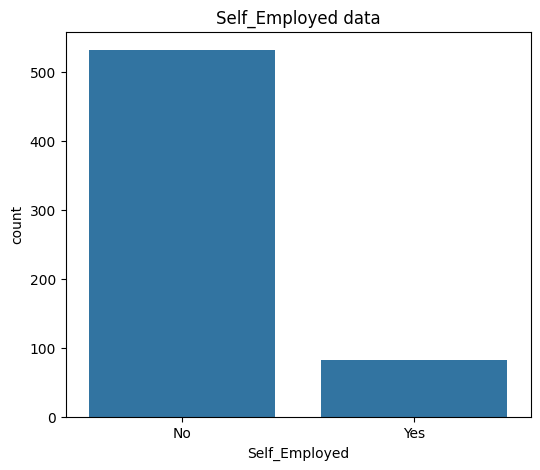

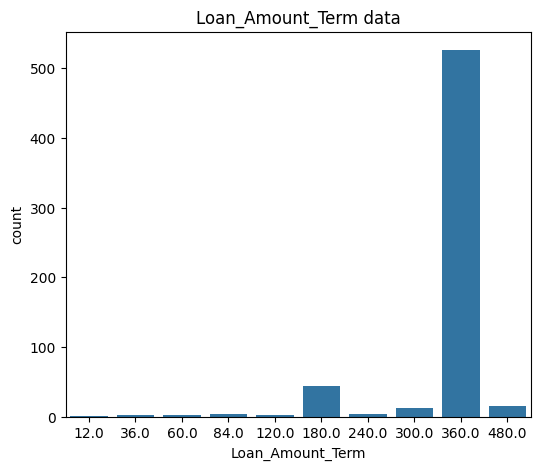

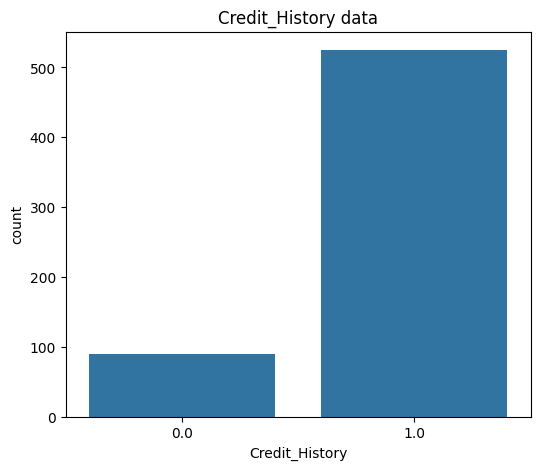

In [21]:
# counters
for i in col[:7]:
 plt.figure(figsize = (6,5))
 sns.countplot(data = df , x = i)
 plt.title(i+' data')
 plt.show()

In [22]:
col2=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History']

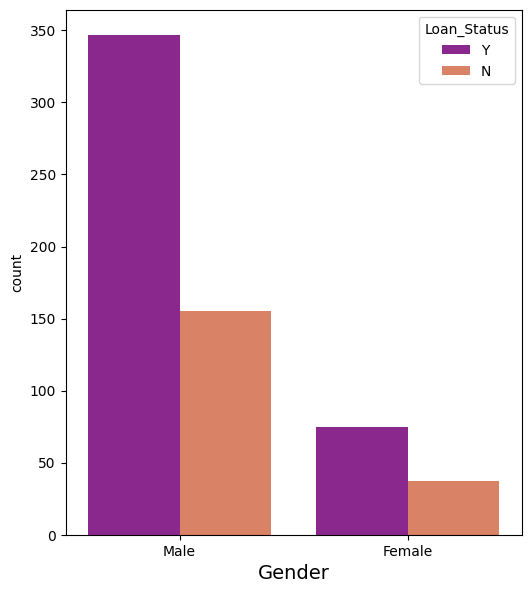

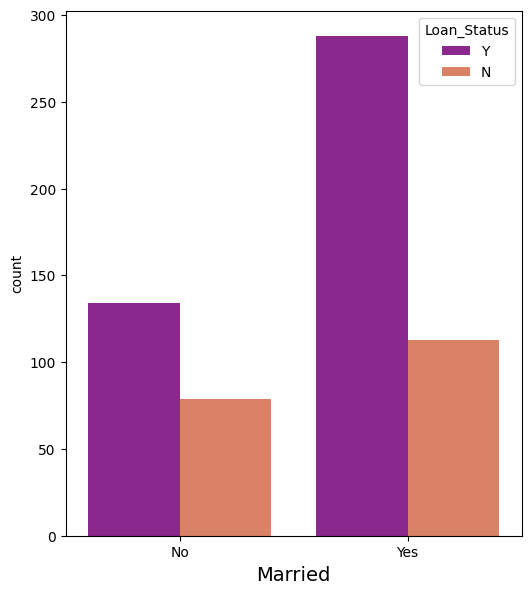

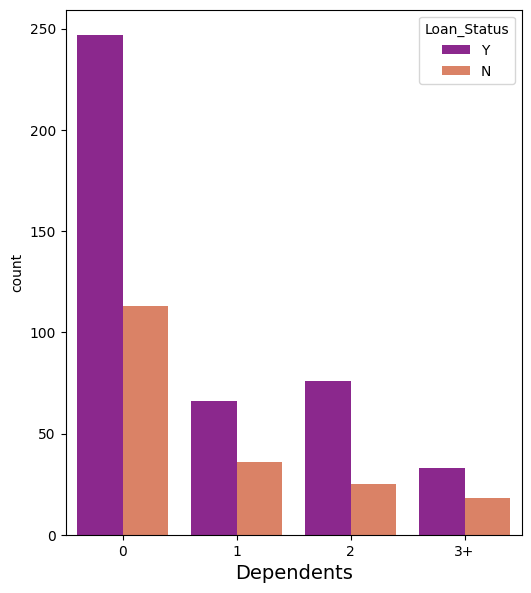

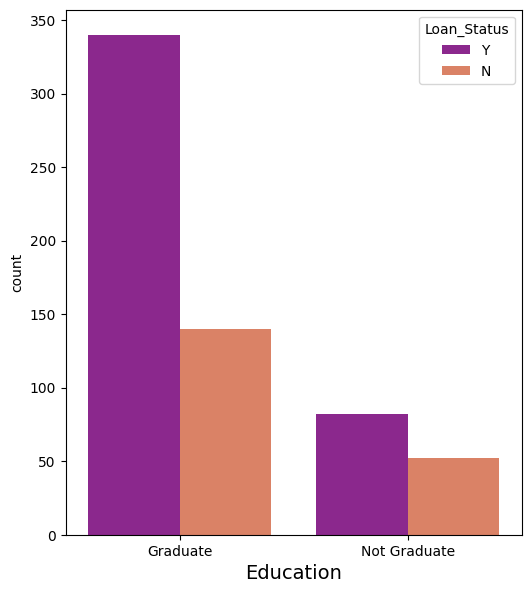

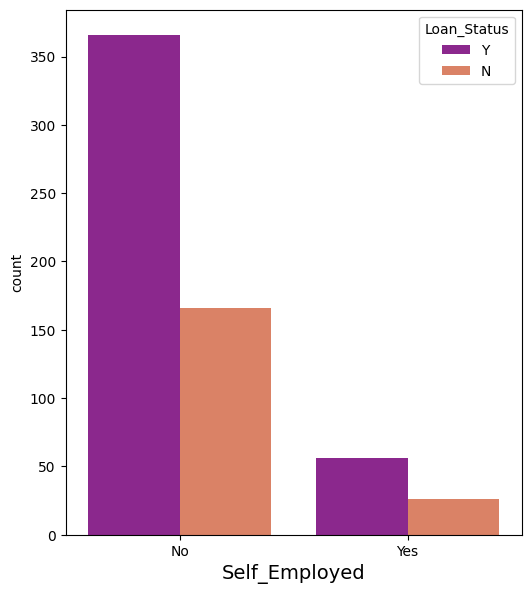

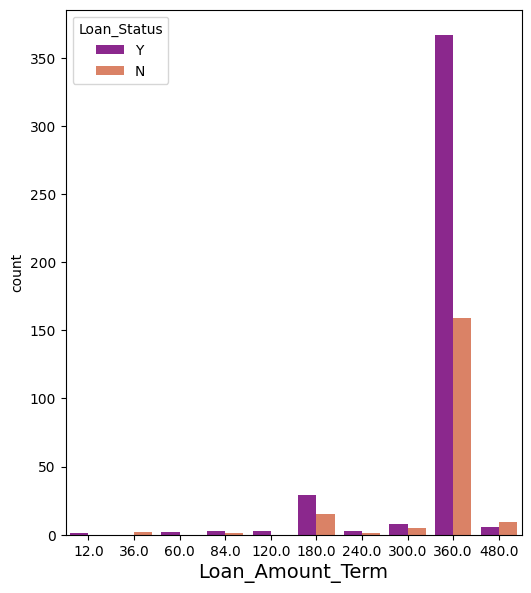

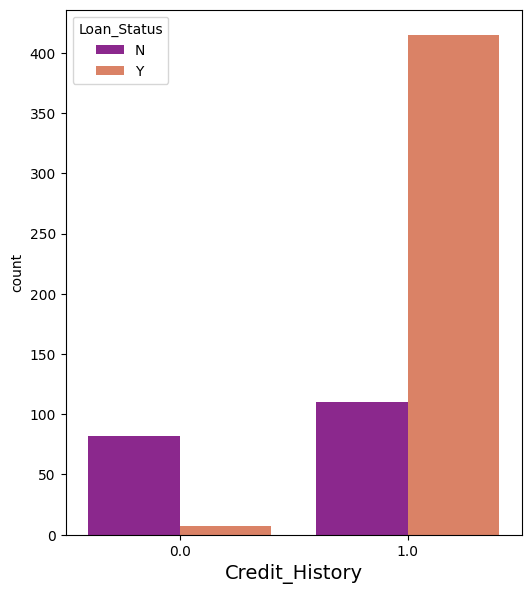

In [23]:
for i in col2[:7]:
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [24]:
d=df['Property_Area'].value_counts()
print(d)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


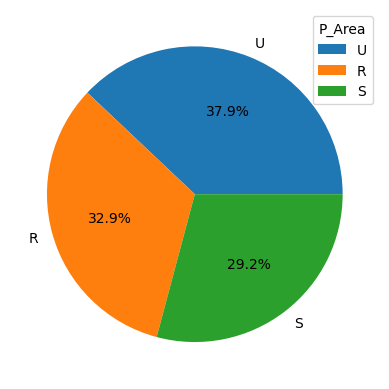

In [25]:
d=dict(d)
mylabels =  ['U', 'R', 'S']
plt.pie(d.values(), labels = mylabels,autopct='%1.1f%%')
plt.legend(title="P_Area")

## The plots reveal the following information regarding the dataset:

1-Gender: Male applicants far outnumber from female applicants, with a ratio of approximately five to one.

2-Marital Status:  married applicants have a greater chance of loan approval.

3-Dependents: The vast majority of the individuals in the dataset do not have any dependents and they also have an increased chance of being approved for a loan.

4-Education: Nearly five-sixths of the population in the dataset have received a graduate degree and have a higher approval rate for loans.

5-Employment : Most of the indvidual in the dataset is not self employed

6-Area of Property: The majority of applicants come from semi-urban areas, and they have a higher likelihood of loan approval.

7-Credit History: Individuals with a credit history have a much higher chance of loan approval.

8-Loan Amount Term: The most common loan term is 360 months, or 30 years, for the majority of loans.

9-Loan Approval: Nearly two-thirds of the loan applicants have received approval for their loan request.



#Label Encoding

In [26]:
#converting categorical values to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Education'] = le.fit_transform(df['Education'])
df['Married'] = le.fit_transform(df['Married'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


#Standarize the big no. in the data from 0 to 1

In [27]:
#standarize the columns havig big numbers
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.570528,0.000000,0.547459,360.0,1.0,2,1
1,1,1,1,0,0,0.443788,0.264515,0.474104,360.0,1.0,0,0
2,1,1,0,0,1,0.285314,0.000000,0.227092,360.0,1.0,2,1
3,1,1,0,1,0,0.243568,0.413612,0.442231,360.0,1.0,2,1
4,1,0,0,0,0,0.585644,0.000000,0.525896,360.0,1.0,2,1


#Feature Selection

In [28]:
Y= df['Loan_Status']
X= df.drop(columns=['Loan_Status'])

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

   Name of the column      Score
9      Credit_History  26.005877
8    Loan_Amount_Term   3.778554
3           Education   3.540502
1             Married   1.782425
10      Property_Area   0.377837
6   CoapplicantIncome   0.275846
2          Dependents   0.085953
7          LoanAmount   0.041090
0              Gender   0.036234
5     ApplicantIncome   0.013447


<Axes: >

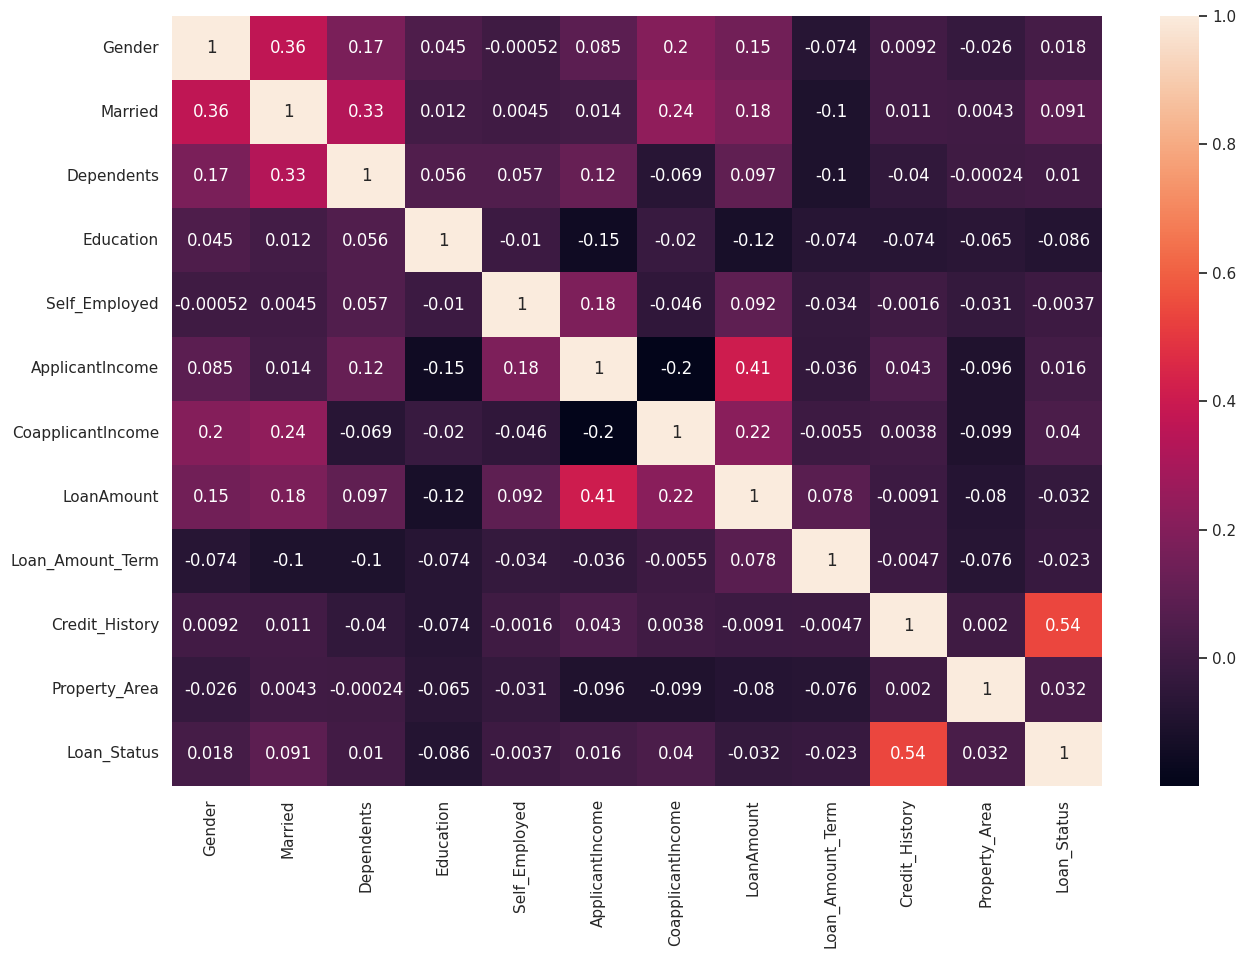

In [30]:
# plotting the correlation matrix
df.corr()
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(df.corr(),annot=True)

In [31]:
correlations = df.corr()['Loan_Status'].drop('Loan_Status')
print(correlations)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome      0.015912
CoapplicantIncome    0.039885
LoanAmount          -0.031653
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Name: Loan_Status, dtype: float64


#spliting the data to train ad test

In [32]:
X= df[['Credit_History', 'Loan_Amount_Term', 'Education', 'Married']]
X.head()

,Credit_History,Loan_Amount_Term,Education,Married
0,1.0,360.0,0,0
1,1.0,360.0,0,1
2,1.0,360.0,0,1
3,1.0,360.0,1,1
4,1.0,360.0,0,0


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 6)

# Creating models that fits the data

##Logistic Regression



In [34]:
#Logistic Regression model
log=LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

the accuracy of log reg is:  0.8325123152709359
              precision    recall  f1-score   support

           0       0.97      0.46      0.62        61
           1       0.81      0.99      0.89       142

    accuracy                           0.83       203
   macro avg       0.89      0.73      0.76       203
weighted avg       0.86      0.83      0.81       203

Mean Squared Error: 0.16748768472906403


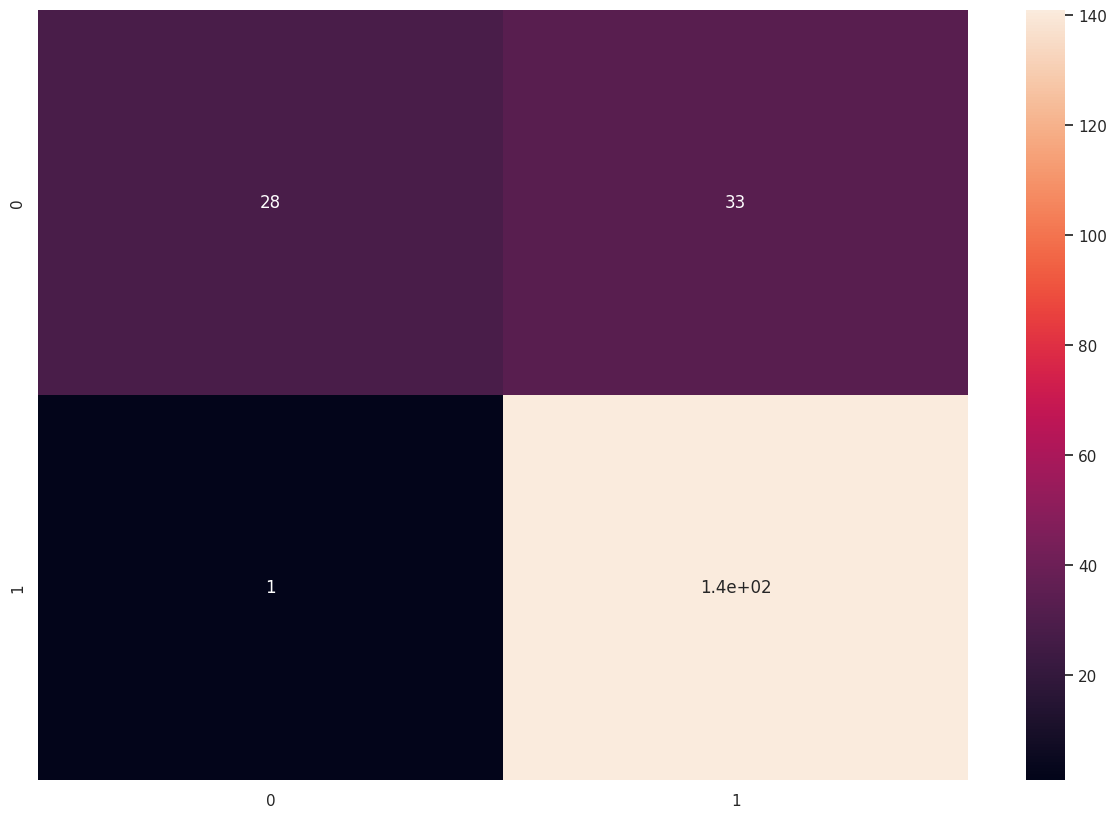

In [35]:
log_y_pred=log.predict(X_test)

print("the accuracy of log reg is: " , accuracy_score(Y_test,log_y_pred))

confusion_matrix1 = confusion_matrix(Y_test, log_y_pred)
sns.heatmap(confusion_matrix1, annot=True)

log_cr=classification_report(Y_test, log_y_pred)
print(log_cr)

print("Mean Squared Error:",metrics.mean_squared_error(Y_test,log_y_pred))

##SVM


In [36]:
svm =SVC(kernel='linear')
svm.fit(X_train,Y_train)

SVC(kernel='linear')

the accuracy of SVM is:  0.8325123152709359
              precision    recall  f1-score   support

           0       0.97      0.46      0.62        61
           1       0.81      0.99      0.89       142

    accuracy                           0.83       203
   macro avg       0.89      0.73      0.76       203
weighted avg       0.86      0.83      0.81       203

Mean Squared Error: 0.16748768472906403


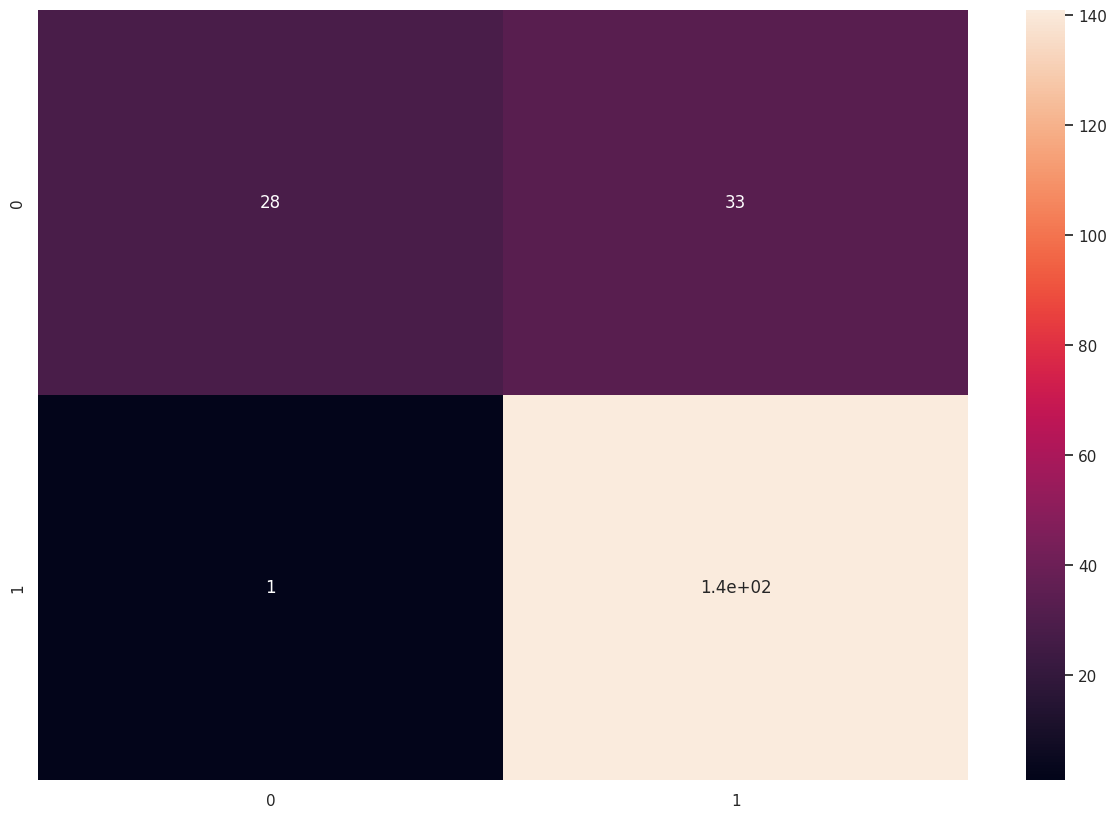

In [37]:
svm_y_pred = svm.predict(X_test)

print("the accuracy of SVM is: ", accuracy_score(Y_test, svm_y_pred))

confusion_matrix2 = confusion_matrix(Y_test, svm_y_pred)
sns.heatmap(confusion_matrix2, annot=True)

svm_cr=classification_report(Y_test, svm_y_pred)
print(svm_cr)

print("Mean Squared Error:",metrics.mean_squared_error(Y_test,svm_y_pred))

##Decision Tree

In [38]:
#DecisionTree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

the accuracy of dt is:  0.8078817733990148
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        61
           1       0.80      0.96      0.87       142

    accuracy                           0.81       203
   macro avg       0.81      0.71      0.73       203
weighted avg       0.81      0.81      0.79       203

Mean Squared Error: 0.1921182266009852


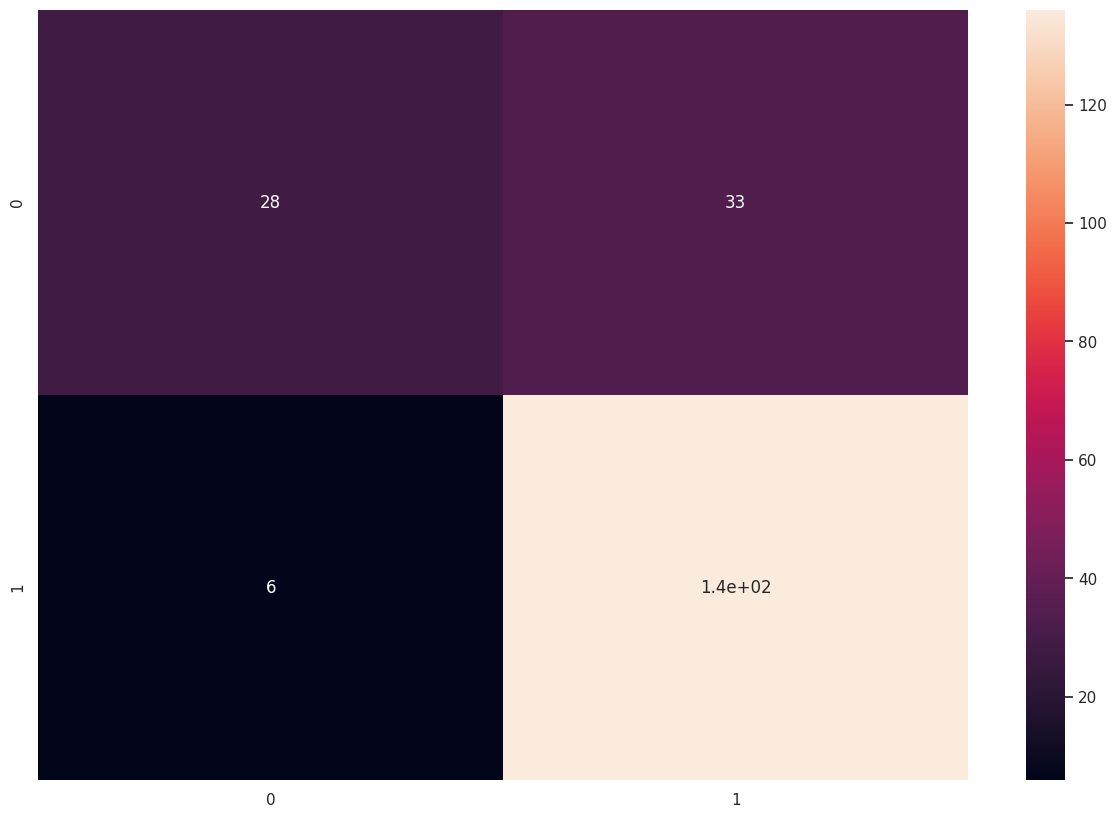

In [39]:
dt_y_pred = dt.predict(X_test)
# Accuracy score
print("the accuracy of dt is: " , accuracy_score(Y_test,dt_y_pred))

confusion_matrix3 = confusion_matrix(Y_test, dt_y_pred)
sns.heatmap(confusion_matrix3, annot=True)

dt_cr=classification_report(Y_test, dt_y_pred)
print(dt_cr)

print("Mean Squared Error:",metrics.mean_squared_error(Y_test,dt_y_pred))

##Decision Tree when making Grid Search on it


In [40]:
#to maximize the efectiveness
from sklearn.model_selection import GridSearchCV

param_grid = {
    'random_state' : [0,1,2,3,4,5],
    'max_depth' : [1,2,3,4,5],
# 'max_features' : ['auto', 'sqrt', 'log2']
}

#cv=5 means that the data is split into 5 parts and the model is trained on 4 parts and tested on 1 part.
#This process is repeated 5 times and the average score is calculated.
# I will evaluate the performance of the model on the test set using the F1 score
grid_search = GridSearchCV(dt, param_grid=param_grid,
                           cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'random_state': [0, 1, 2, 3, 4, 5]},
             scoring='f1')

In [41]:
#the accuracy of the grid search
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=1, random_state=0)


the accuracy of dt after gs is:  0.8325123152709359
              precision    recall  f1-score   support

           0       0.97      0.46      0.62        61
           1       0.81      0.99      0.89       142

    accuracy                           0.83       203
   macro avg       0.89      0.73      0.76       203
weighted avg       0.86      0.83      0.81       203

Mean Squared Error: 0.16748768472906403


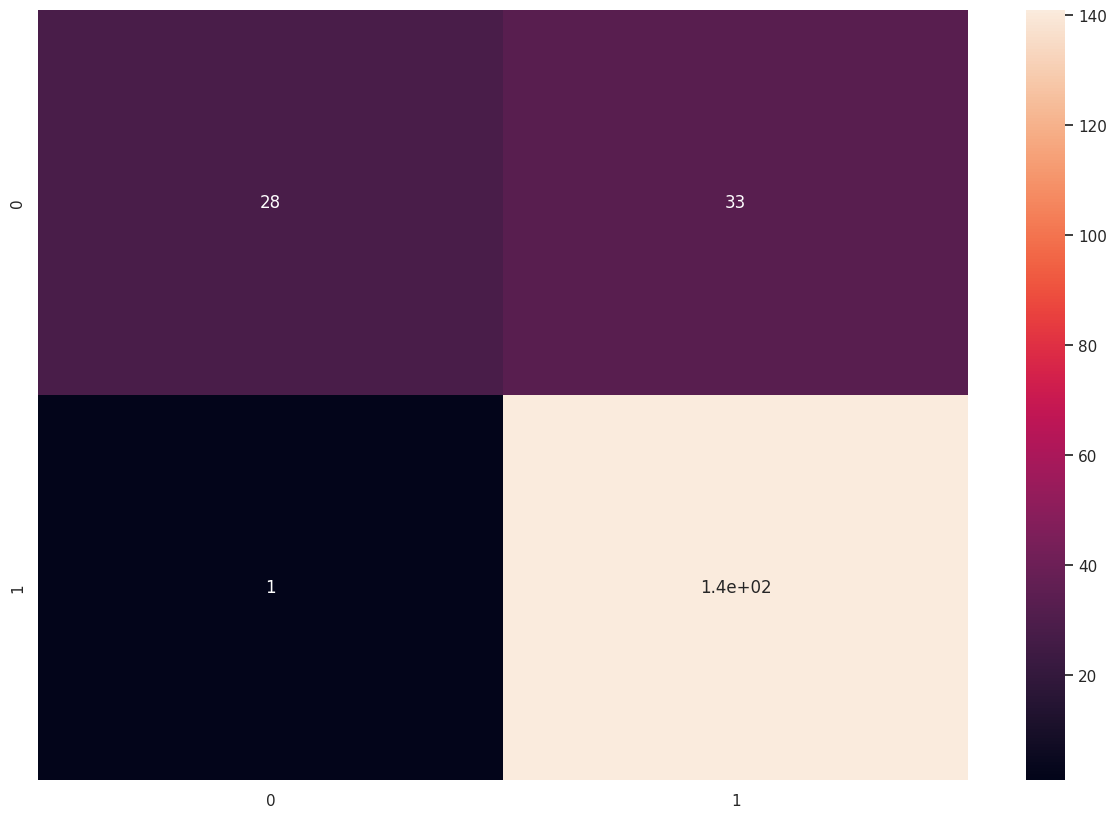

In [42]:
gs_dt_y_pred = grid_search.best_estimator_.predict(X_test)

print("the accuracy of dt after gs is: " , accuracy_score(Y_test, gs_dt_y_pred))

confusion_matrix4 = confusion_matrix(Y_test, gs_dt_y_pred)
sns.heatmap(confusion_matrix4, annot=True)

gs_dt_cr=classification_report(Y_test, gs_dt_y_pred)
print(gs_dt_cr)

print("Mean Squared Error:",metrics.mean_squared_error(Y_test,gs_dt_y_pred))

##RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=5)
randomforest.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

the accuracy of dt is:  0.8226600985221675
              precision    recall  f1-score   support

           0       0.93      0.44      0.60        61
           1       0.80      0.99      0.89       142

    accuracy                           0.82       203
   macro avg       0.87      0.71      0.74       203
weighted avg       0.84      0.82      0.80       203

Mean Squared Error: 0.17733990147783252


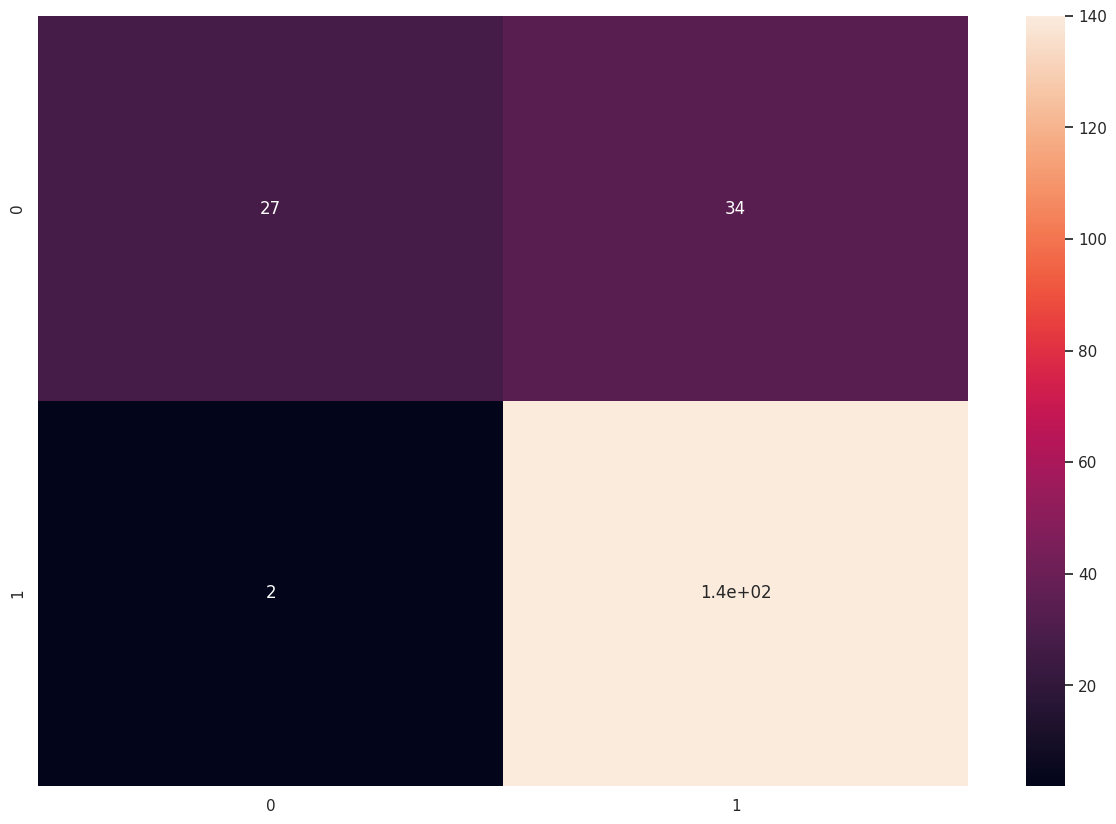

In [44]:
rf_y_pred = randomforest.predict(X_test)

print("the accuracy of dt is: " , accuracy_score(Y_test, rf_y_pred))

confusion_matrix6 = confusion_matrix(Y_test, rf_y_pred)
sns.heatmap(confusion_matrix6, annot=True)

rf_cr=classification_report(Y_test, rf_y_pred)
print(rf_cr)

print("Mean Squared Error:",metrics.mean_squared_error(Y_test,rf_y_pred))